# Data mining HW4

author: Ali ArjomandBigdeli (Student Number: 9423008)

## Question 2: Compare two clustering algorithms(KMeans VS. DBSCAN)

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

In [2]:
dataset1 = pd.read_csv('./Data/Dataset1.csv')
dataset2 = pd.read_csv('./Data/Dataset2.csv')

In [3]:
# check null values
print(f"null values: {dataset1.isnull().sum()}")
print(f"null values: {dataset2.isnull().sum()}")

null values: X    0
Y    0
dtype: int64
null values: X    0
Y    0
dtype: int64


In [4]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 

def kmeans_elbow(dataset):
    x1 = dataset['X'].to_numpy()
    x2 = dataset['Y'].to_numpy()
    plt.plot()
    # plt.xlim([0, 10])
    # plt.ylim([0, 10])
    plt.title('Dataset')
    plt.scatter(x1, x2)
    plt.show()

    # create new plot and data
    plt.plot()
    X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
    colors = ['b', 'g', 'r']
    markers = ['o', 'v', 's']

    # k means determine k
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    print(f'distortions: {distortions}')

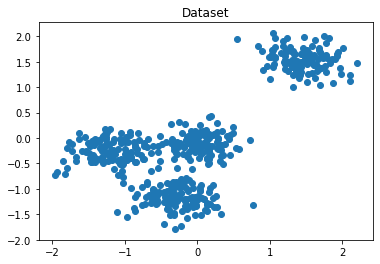

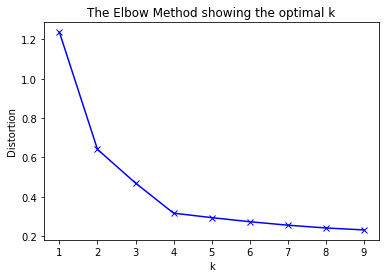

distortions: [1.2364965309584137, 0.6408392294166216, 0.46937013218548257, 0.31622754789135143, 0.29354464125012725, 0.2727977295541531, 0.25507564988203907, 0.24095403992589265, 0.23097578151328518]


In [5]:
kmeans_elbow(dataset1)

according to the elbow method and plot of data optimal k is 2,4

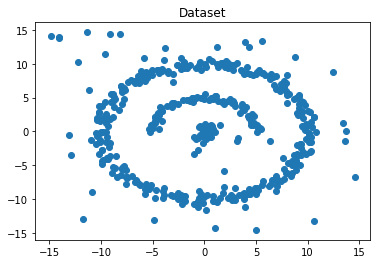

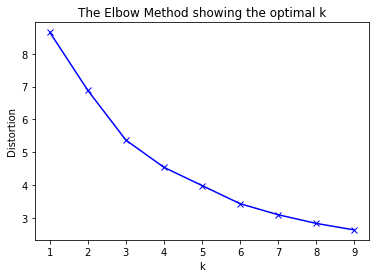

distortions: [8.658345154205232, 6.884500740055883, 5.367434856734283, 4.537464965388672, 3.982319970429412, 3.428404685936329, 3.0917841392366734, 2.826971030792238, 2.627740120841837]


In [6]:
kmeans_elbow(dataset2)

best k that finds is 1 instead of 3 because **kmeans is not suitable to discover clusters with non-convex shapes**

In [7]:
def DBSCAN_esp(dataset, min_pts, min_eps=0.1, max_eps=1.1, step=0.1):
    x1 = dataset['X'].to_numpy()
    x2 = dataset['Y'].to_numpy()
    plt.plot()
    # plt.xlim([0, 10])
    # plt.ylim([0, 10])
    plt.title('Dataset')
    plt.scatter(x1, x2)
    plt.show()

    # create new plot and data
    plt.plot()
    X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
    colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']

    K = np.arange(start=min_eps, stop=max_eps, step=step)
    for k in K:
        clustering = DBSCAN(eps=k, min_samples=min_pts).fit(X)
        clustering.fit(X)
        clusters = clustering.labels_
        vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
        plt.title(f'eps: {k}, min_pts: {min_pts}')
        plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))
        plt.show()

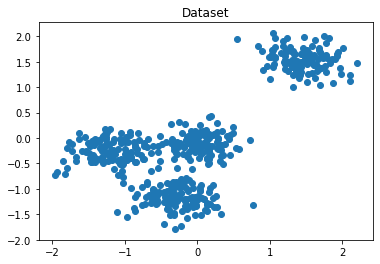

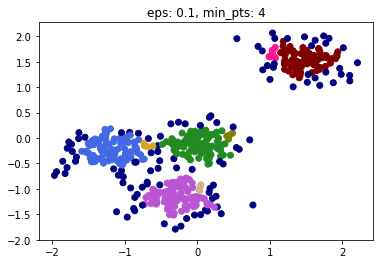

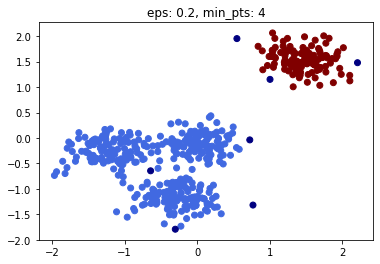

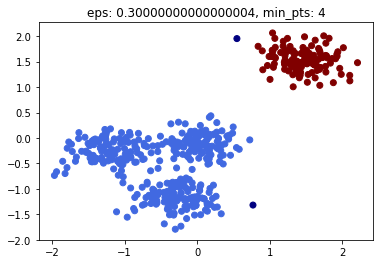

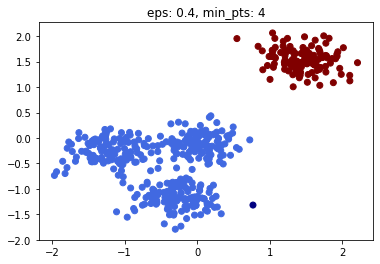

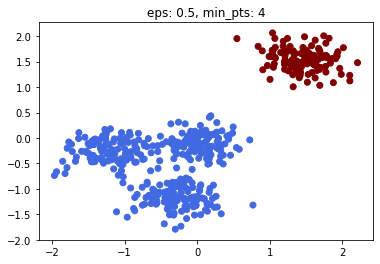

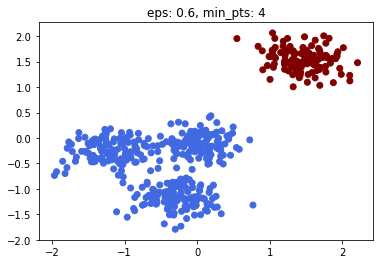

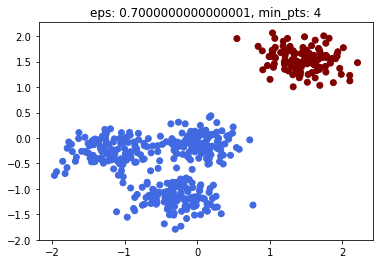

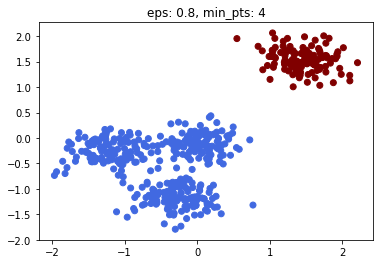

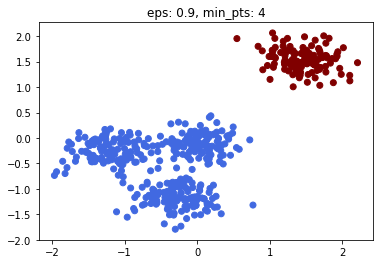

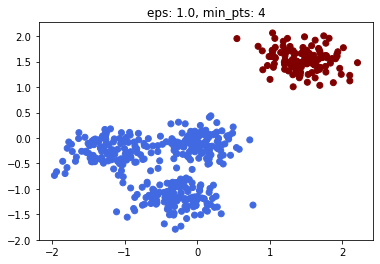

In [8]:
DBSCAN_esp(dataset1, min_pts=4)

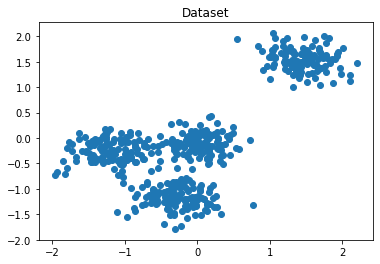

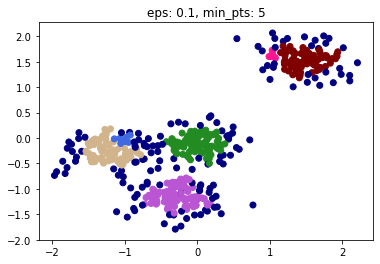

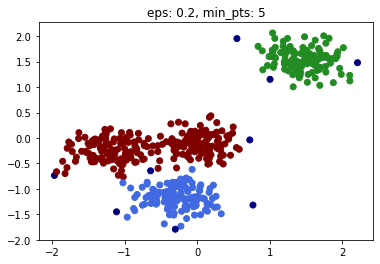

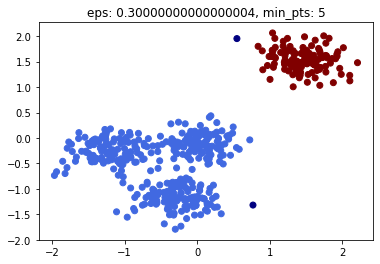

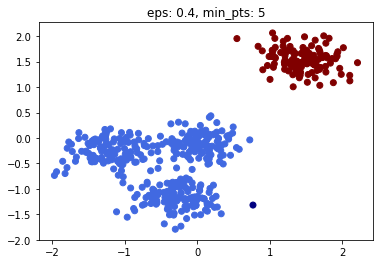

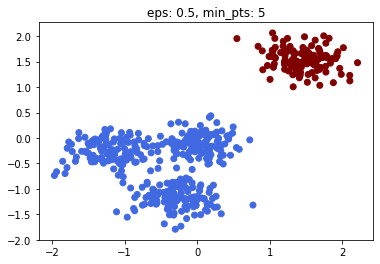

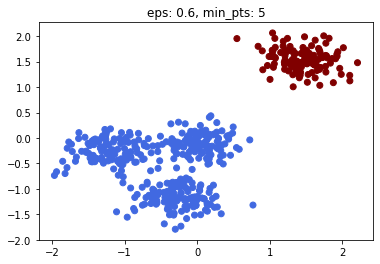

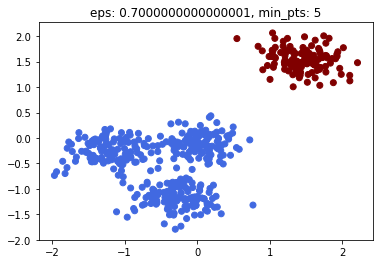

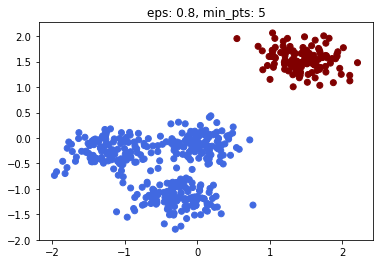

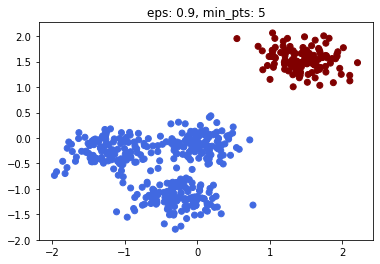

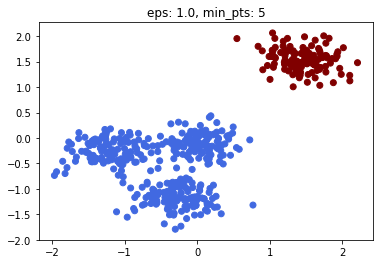

In [9]:
DBSCAN_esp(dataset1, min_pts=5)

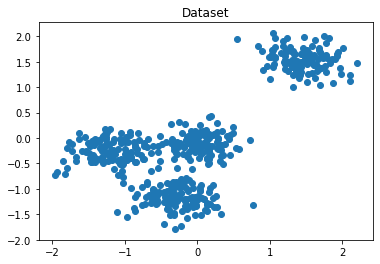

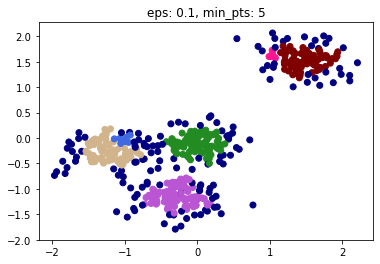

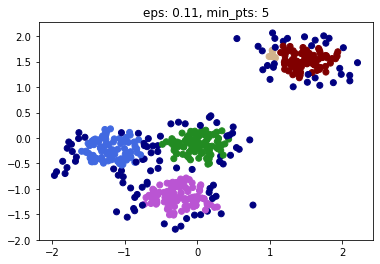

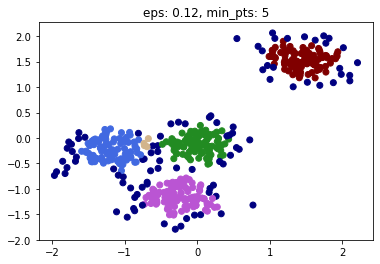

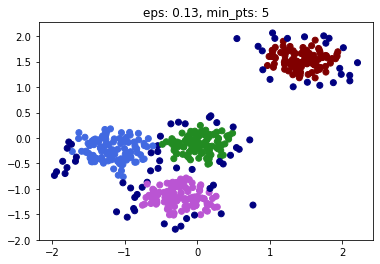

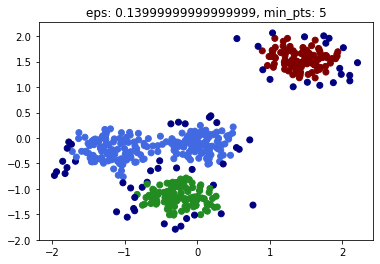

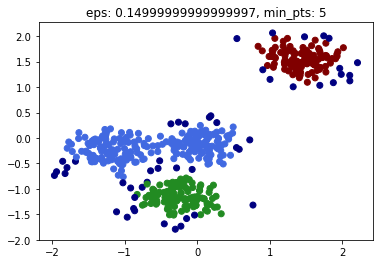

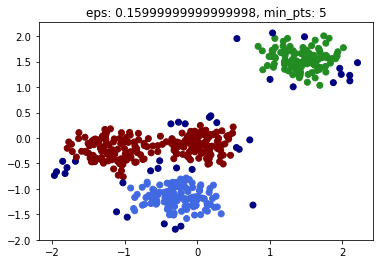

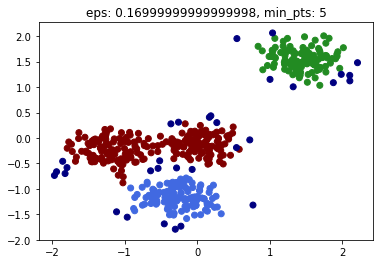

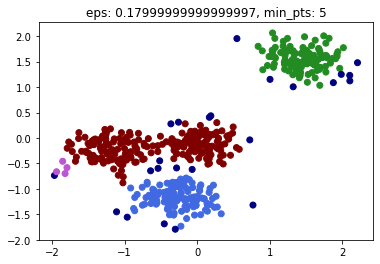

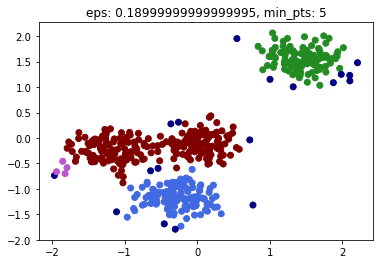

In [10]:
DBSCAN_esp(dataset1, min_pts=5, min_eps=0.1, max_eps=0.2, step=0.01)

according to plots best eps is 0.13 and best min_pts is 5 that represents 4 main clusters

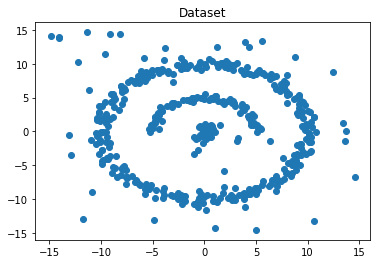

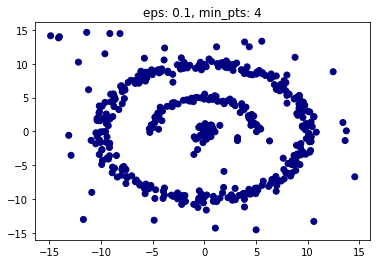

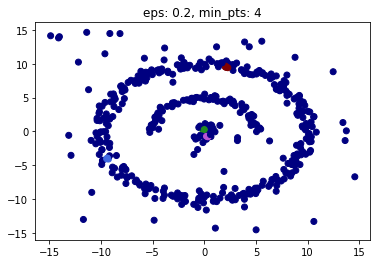

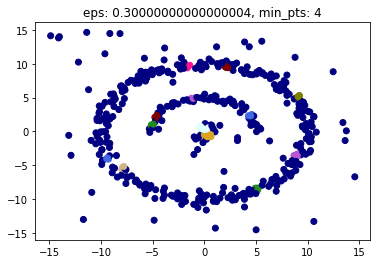

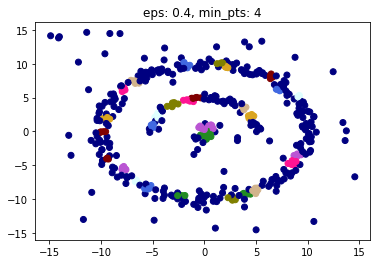

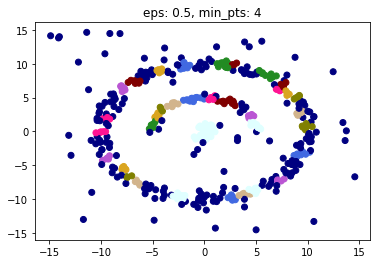

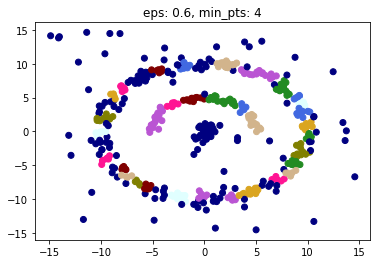

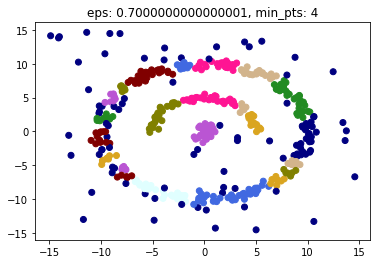

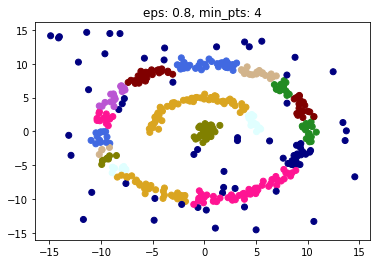

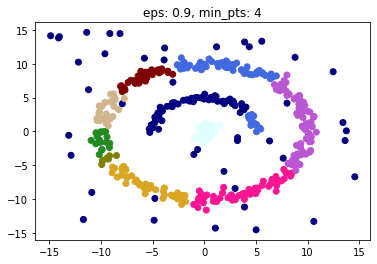

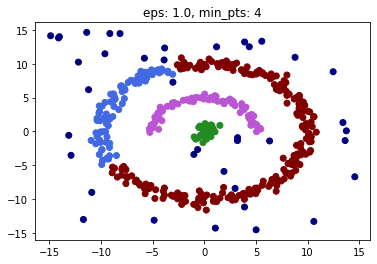

In [11]:
DBSCAN_esp(dataset2, min_pts=4)

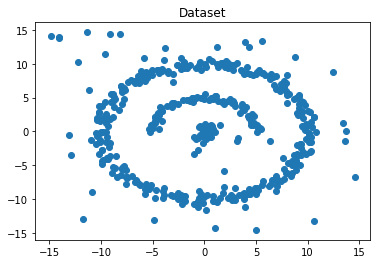

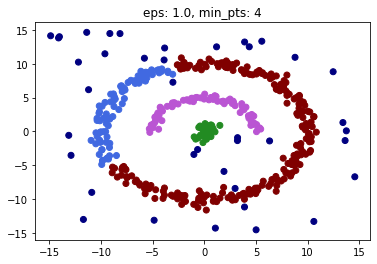

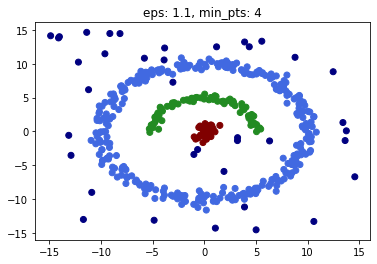

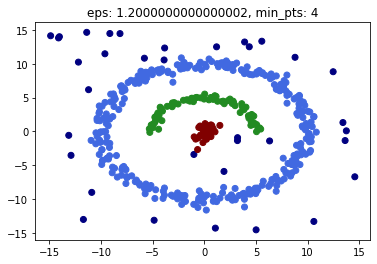

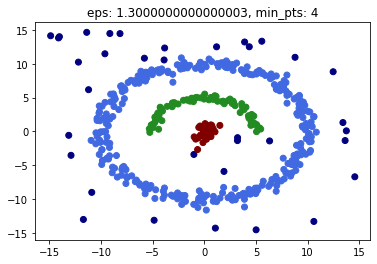

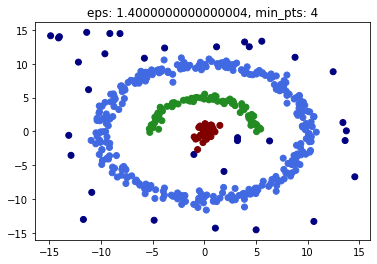

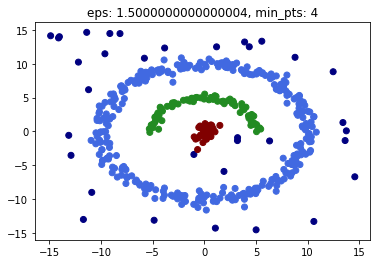

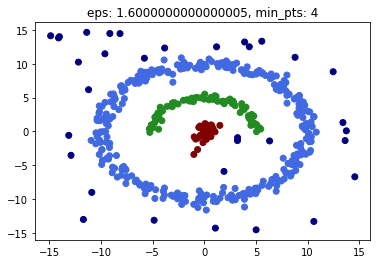

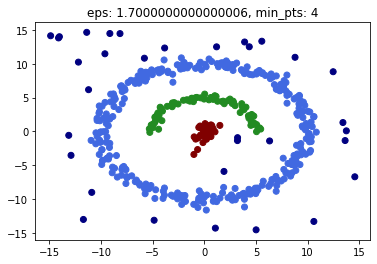

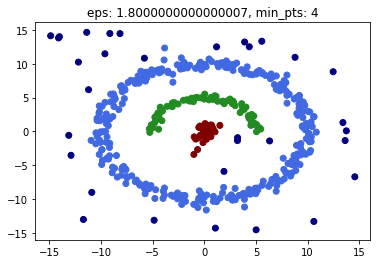

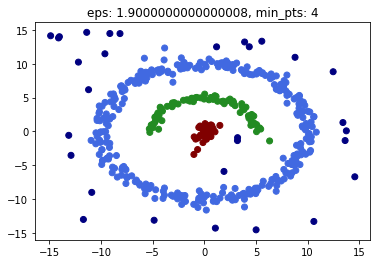

In [12]:
DBSCAN_esp(dataset2, min_pts=4, min_eps=1, max_eps=2.0, step=0.1)

according to plots best eps is 1.9 and best min_pts is 4 that represents 3 main clusters

### part 2: Hierarchical Clustering Dendrogram

In [13]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

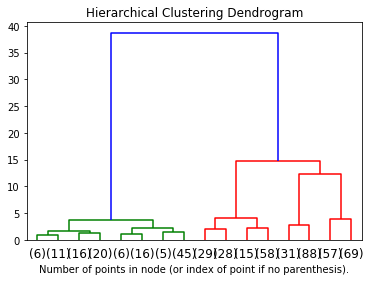

In [14]:
X = dataset1

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

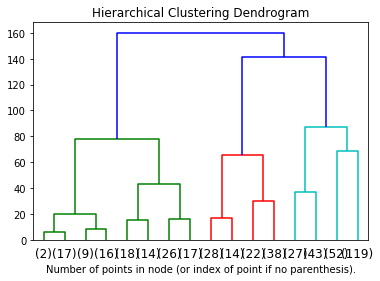

In [15]:
X = dataset2

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## advantages of hierarchical clustering:
1. First, we do not need to specify the number of clusters required for the algorithm.
2. Second, hierarchical clustering is easy to implement.
3. And third, the dendrogram produced is very useful in understanding the data.